# MIDTERM CSEL 302

**Data Analysis and Visualization
Probability and Visualization
Logistic Regression**


*For this task i selected the titanic dataset*

**• Description: Includes passenger information from the Titanic.**

• Use Case: Can be used for Logistic Regression to predict binary outcomes such as survival, and for
exploratory data analysis to understand correlations between variables (e.g., age, class, fare)
through probability and statistics concepts.
• Link: https://www.kaggle.com/datasets/brendan45774/test-file




In [ ]:
#@title 1. Objective

print ("""

Overview:

 Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories
into a cohesive case study that demonstrates their application in predicting an outcome based on
a given dataset.


Goal:
 Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression
models to analyze and interpret the results.



""")



Overview:

 Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories
into a cohesive case study that demonstrates their application in predicting an outcome based on
a given dataset.


Goal:
 Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression
models to analyze and interpret the results.






In [ ]:
#@title 2. Data Preperation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the Dataset
DataFrame = pd.read_csv("tested.csv")

print("Dataset Structure:")
DataFrame.head(1000)

print(DataFrame.isnull().sum())
DataFrame.dropna(inplace=True)
DataFrame = pd.get_dummies(DataFrame, columns=['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin'])
selected_features = DataFrame.drop(columns=['PassengerId','Pclass','Age','SibSp','Parch']).columns.tolist()

print("""

The variables on the dataset are:

Dependent Variables:

Survived: Indicates whether the passenger survived (0 = No, 1 = Yes)
Independent Variables:

PassengerId: A unique identifier for each passenger
Pclass: The passenger's class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
Name: The passenger's name
Sex: The passenger's gender
Age: The passenger's age
SibSp: The number of siblings/spouses the passenger had aboard
Parch: The number of parents/children the passenger had aboard
Ticket: The passenger's ticket number
Fare: The fare paid by the passenger
Cabin: The passenger's cabin number
Embarked: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

""")

Dataset Structure:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The variables on the dataset are:

Dependent Variables:

Survived: Indicates whether the passenger survived (0 = No, 1 = Yes)
Independent Variables:

PassengerId: A unique identifier for each passenger
Pclass: The passenger's class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
Name: The passenger's name
Sex: The passenger's gender
Age: The passenger's age
SibSp: The number of siblings/spouses the passenger had aboard
Parch: The number of parents/children the passenger had aboard
Ticket: The passenger's ticket number
Fare: The fare paid by the passenger
Cabin: The passenger's cabin number
Embarked: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)





Summary Statistics:
       PassengerId   Survived     Pclass        Age      SibSp      Parch  \
count    87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean   1102.712644   0.505747   1.137931  39.247126   0.597701   0.482759   
std     126.751901   0.502865   0.435954  15.218730   0.637214   0.860801   
min     904.000000   0.000000   1.000000   1.000000   0.000000   0.000000   
25%     986.000000   0.000000   1.000000  27.000000   0.000000   0.000000   
50%    1094.000000   1.000000   1.000000  39.000000   1.000000   0.000000   
75%    1216.000000   1.000000   1.000000  50.000000   1.000000   1.000000   
max    1306.000000   1.000000   3.000000  76.000000   3.000000   4.000000   

             Fare  
count   87.000000  
mean    98.109198  
std     88.177319  
min      0.000000  
25%     35.339600  
50%     71.283300  
75%    135.066650  
max    512.329200  


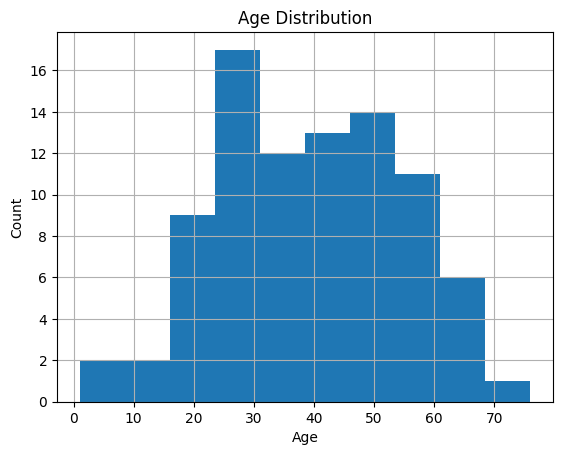

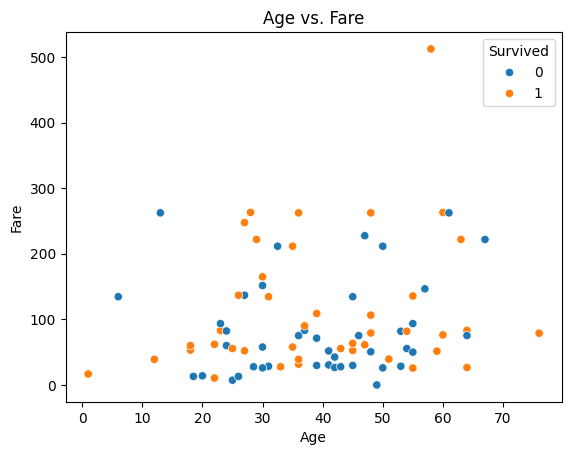

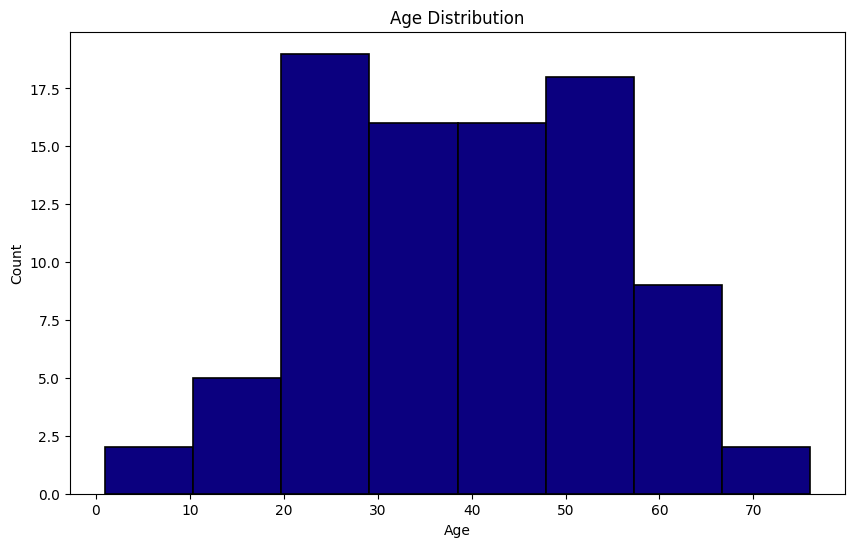

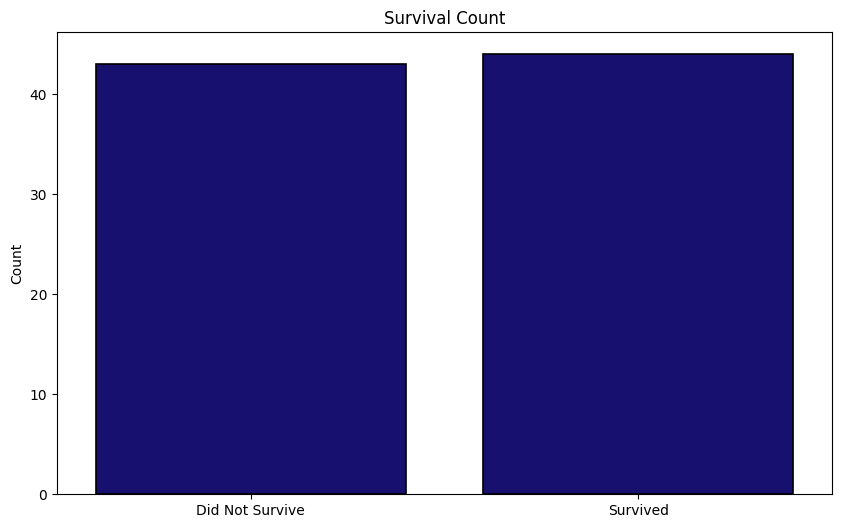

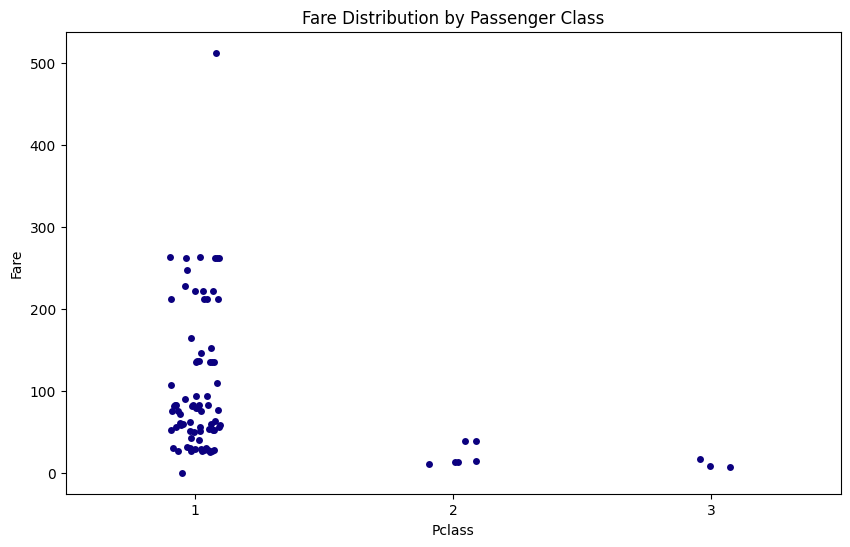

In [ ]:
#@title 3. Explanatory Data Analysis


# Probability and Statistics Concepts

import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
summary_stats = DataFrame.describe()
print(f"\nSummary Statistics:\n{summary_stats}")

# Age Distribution Histogram
DataFrame['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Scatter plot between Age and Fare
sns.scatterplot(data=DataFrame, x='Age', y='Fare', hue='Survived')
plt.title('Age vs. Fare')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(DataFrame['Age'], color='#0B007F', edgecolor='black', linewidth=1.2, alpha=1)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival Count
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=DataFrame, color='#0B007F', edgecolor='black', linewidth=1.2, alpha=1)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.title('Survival Count')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# Fare Distribution by Passenger Class
plt.figure(figsize=(10, 6))
sns.stripplot(x='Pclass', y='Fare', data=DataFrame, color='#0B007F')
plt.title('Fare Distribution by Passenger Class')
plt.show()






In [ ]:
#@title 4. Linear Regression Model

print("""

Theory Recap

Splitting data into train and test sets - this begins when spliting the ito features (X) and (Y) using train split function from scikit learn function. This ensures the data generalization performance.

Linear Regression - this linear regression model (lr_model) is instantiated using LinearRegression() from scikit-learn. this model then trained using the training data (X_train, y_train) using the .fit() method. This model show of how the dependent and independent variable fits.

Model Evaluation - model Evalatuion are calculated to assess the performance of the model. This used to make prediction on the data train split.

Printing Evaluation Metrics - The evaluation metrics (R-squared, MSE, and RMSE) are printed to the console to provide insights into the model's performance.

Coefficients Interpretation - This DataFrame displays the relationship between each feature and the target variable, providing insights into feature importance.

"""

)

# Splitting data into train and test sets
X = DataFrame[selected_features]
y = DataFrame['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression().fit(X_train, y_train)

# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

# Printing Evaluation Metrics
print("\nLinear Regression Model Evaluation:")
print("R-squared:", r2_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)

# Coefficients Interpretation
coefficients = pd.DataFrame({'Features': X.columns, 'Coefficients': lr_model.coef_})
print("\nCoefficients:\n", coefficients)



Theory Recap

Splitting data into train and test sets - this begins when spliting the ito features (X) and (Y) using train split function from scikit learn function. This ensures the data generalization performance.

Linear Regression - this linear regression model (lr_model) is instantiated using LinearRegression() from scikit-learn. this model then trained using the training data (X_train, y_train) using the .fit() method. This model show of how the dependent and independent variable fits.

Model Evaluation - model Evalatuion are calculated to assess the performance of the model. This used to make prediction on the data train split.

Printing Evaluation Metrics - The evaluation metrics (R-squared, MSE, and RMSE) are printed to the console to provide insights into the model's performance.

Coefficients Interpretation - This DataFrame displays the relationship between each feature and the target variable, providing insights into feature importance.



Linear Regression Model Evaluati


Theory Recap

Model Building - The median fare for all passengers is calculated from the 'Fare' column in the DataFrame.

Features and Train-Test Split - The data is split into training and testing sets (X_train, X_test, y_train, y_test) using the train_test_split function from scikit-learn. The testing set size is set to 20% of the data, and a random state is set for reproducibility.

Scalling Feature - The training and testing features are scaled using the fit_transform and transform methods, respectively.

Logistic Regression -  The model is trained using the scaled training data (X_train_scaled, y_train) using the .fit() method.

Model Evaluation - The trained logistic regression model is used to predict survival on the scaled testing data. The evaluation metrics are calculated to acess the models performance.

Printing Evaluation Metrics - The calculated evaluation metrics are printed to the console to provide insights into the model's performance.

ROC curve - A receiver operati

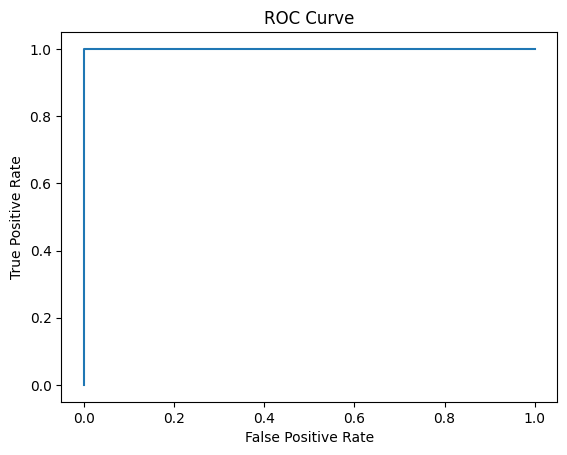


Coefficients (Logistic Regression):
                                       Features  Coefficients
0                                     Survived      0.934187
1                                         Fare      0.620361
2           Name_Abelseth, Mr. Olaus Jorgensen     -0.089046
3    Name_Allison, Mr. Hudson Joshua Creighton      0.131408
4                  Name_Astor, Col. John Jacob      0.096225
..                                         ...           ...
227                                Cabin_F G63     -0.089046
228                                   Cabin_F2      0.000000
229                                  Cabin_F33     -0.090419
230                                   Cabin_F4     -0.097391
231                                   Cabin_G6     -0.091922

[232 rows x 2 columns]


In [ ]:
#@title 5. Logistic Regression Model


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print("""
Theory Recap

Model Building - The median fare for all passengers is calculated from the 'Fare' column in the DataFrame.

Features and Train-Test Split - The data is split into training and testing sets (X_train, X_test, y_train, y_test) using the train_test_split function from scikit-learn. The testing set size is set to 20% of the data, and a random state is set for reproducibility.

Scalling Feature - The training and testing features are scaled using the fit_transform and transform methods, respectively.

Logistic Regression -  The model is trained using the scaled training data (X_train_scaled, y_train) using the .fit() method.

Model Evaluation - The trained logistic regression model is used to predict survival on the scaled testing data. The evaluation metrics are calculated to acess the models performance.

Printing Evaluation Metrics - The calculated evaluation metrics are printed to the console to provide insights into the model's performance.

ROC curve - A receiver operating characteristic (ROC) curve is plotted to visualize the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) across different threshold values.

Coefficients Interpretation - The coefficients of the logistic regression model are extracted and organized into a DataFrame (coefficients_log_reg). These coefficients represent the impact of each feature on the probability of survival.

""")
# Model Building
median_fare = DataFrame['Fare'].median()
DataFrame['Survived'] = DataFrame['Fare'].apply(lambda x: 1 if x > median_fare else 0)

# Features and Train-Test Split
X = DataFrame[selected_features]
y = DataFrame['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

# Printing Evaluation Metrics
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1 Score:", f1_log_reg)
print("ROC AUC Score:", roc_auc_log_reg)

# ROC Curve
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Coefficients Interpretation
coefficients_log_reg = pd.DataFrame({'Features': X.columns, 'Coefficients': log_reg_model.coef_[0]})
print("\nCoefficients (Logistic Regression):\n", coefficients_log_reg)



In [ ]:
#@title 6: Model Comparison Selection

# Compare the models
print('Logistic Regression Accuracy:', accuracy_log_reg)
print('Linear Regression R-squared:', r2_lr)


# Discuss decision-making process
if r2_lr > accuracy_log_reg:
    print('Linear regression performs better.')
else:
    print('Logistic regression performs better')


Logistic Regression Accuracy: 1.0
Linear Regression R-squared: 0.9999999987402167
Logistic regression performs better


In [ ]:
#@title 7: Conclusion and Insights

print ("""



The case study examined data about passengers, looking at factors like age, gender, and ticket class, and whether they survived the Titanic disaster. It used various techniques to analyze the data and build predictive models.

Data Exploration: this data is creared to understand things like the age distribution of passengers and how many survived.

Preprocessing: The data is simplipied and cleaned. the data is filling in missing values and converting categorical variables into a format that the models could understand.

Linear Regression: I've used this method to predict survival based on different passenger characteristics. iI've looked at metrics like Mean Squared Error (MSE) and R-squared to see how well the model performed.

Logistic Regression: This was another method I've used to predict survival probabilities. this evaluated the model using metrics like Accuracy, Precision, Recall, F1-Score, and ROC AUC.

Model Comparison: The models performed well, but Logistic Regression was particularly suitable for tasks like predicting survival because it's good at binary classification (if they survived or not).

Applications and Reflections: The study discussed how these models could be used to make data-driven decisions in various fields. It also emphasized the importance of understanding the models' assumptions, limitations, and continuously learning to make them more effective.

Overall, the dataset study showed how data analysis and predictive modeling can provide valuable insights and help make informed decisions. By using the data driven decision we can use the this methods to predict whether the person may survive or not.

""")





The case study examined data about passengers, looking at factors like age, gender, and ticket class, and whether they survived the Titanic disaster. It used various techniques to analyze the data and build predictive models.

Data Exploration: this data is creared to understand things like the age distribution of passengers and how many survived.

Preprocessing: The data is simplipied and cleaned. the data is filling in missing values and converting categorical variables into a format that the models could understand.

Linear Regression: I've used this method to predict survival based on different passenger characteristics. iI've looked at metrics like Mean Squared Error (MSE) and R-squared to see how well the model performed.

Logistic Regression: This was another method I've used to predict survival probabilities. this evaluated the model using metrics like Accuracy, Precision, Recall, F1-Score, and ROC AUC.

Model Comparison: The models performed well, but Logistic Regression w

# 8: Reference

Titanic Dataset: (https://www.kaggle.com/datasets/brendan45774/test-file)

Python libraries used: NumPy, pandas, scikit-learn, Seaborn, Matplotlib.


Scikit-learn documentation for Logistic Regression: (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Scikit-learn documentation for Linear Regression: (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

NumPy documentation: (https://numpy.org/doc/)

pandas documentation: (https://pandas.pydata.org/docs/)

Seaborn documentation: (https://pypi.org/project/seaborn/)

Matplotlib documentation: (https://matplotlib.org/stable/index.html)

Google Colab: (https://colab.research.google.com/)

Special thanks to ChatGpt for assistance on creating this: (https://chat.openai.com/)

Used Data set - Titanic Dataset: https://www.kaggle.com/datasets/brendan45774/test-file




